In [43]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

train_data = pd.read_csv('data/train.csv', index_col='Id')
X_test = test_data = pd.read_csv('data/test.csv', index_col='Id')
X_train, y = train_data.iloc[:, :-1], train_data.iloc[:, -1]
X = pd.concat([X_train, X_test])
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml


<AxesSubplot:>

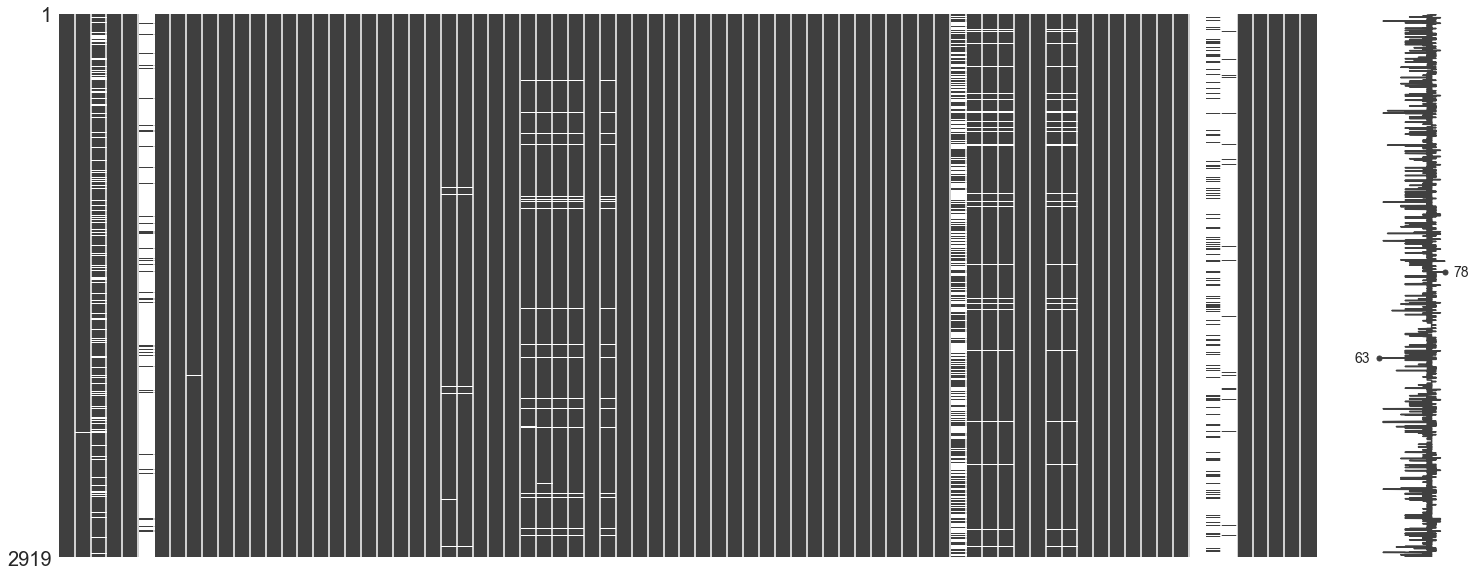

In [4]:
import missingno as missno

missno.matrix(X)

In [49]:
miss_ratio = pd.DataFrame(X.isnull().sum() / X.shape[0],columns=['miss_ratio'])
miss_ratio['feature_importance'] = X_train.corrwith(y)
miss_ratio.sort_values(by='miss_ratio',ascending=False)
# Alley，PoolQC，Fence和MiscFeature包含大量缺失值

,miss_ratio,feature_importance
PoolQC,0.996574,NaN
MiscFeature,0.964029,NaN
Alley,0.932169,NaN
Fence,0.804385,NaN
FireplaceQu,0.486468,NaN
...,...,...
1stFlrSF,0.000000,0.605852
2ndFlrSF,0.000000,0.319334
LowQualFinSF,0.000000,-0.025606
GrLivArea,0.000000,0.708624


<AxesSubplot:>

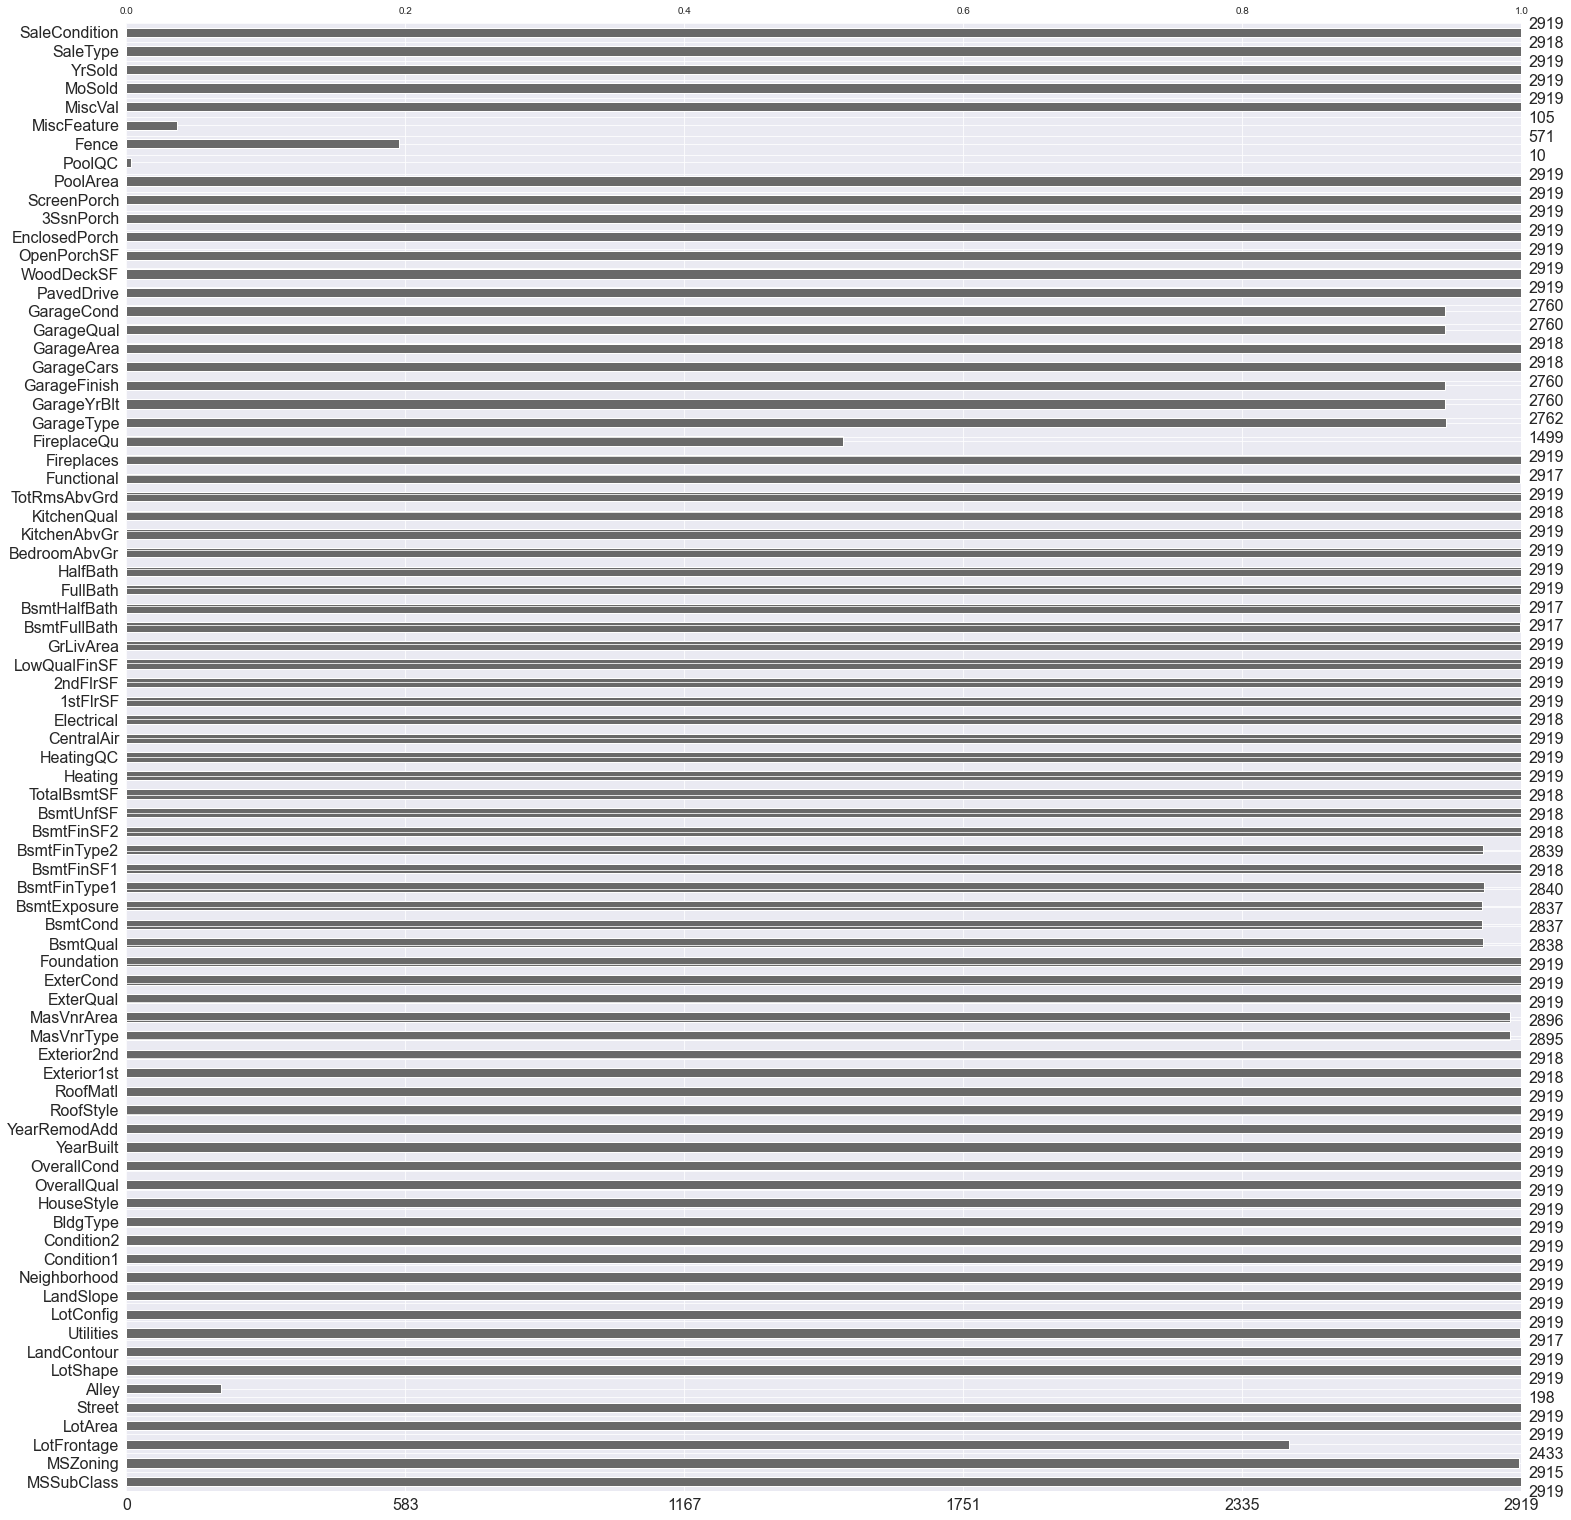

In [6]:
missno.bar(X)

<AxesSubplot:>

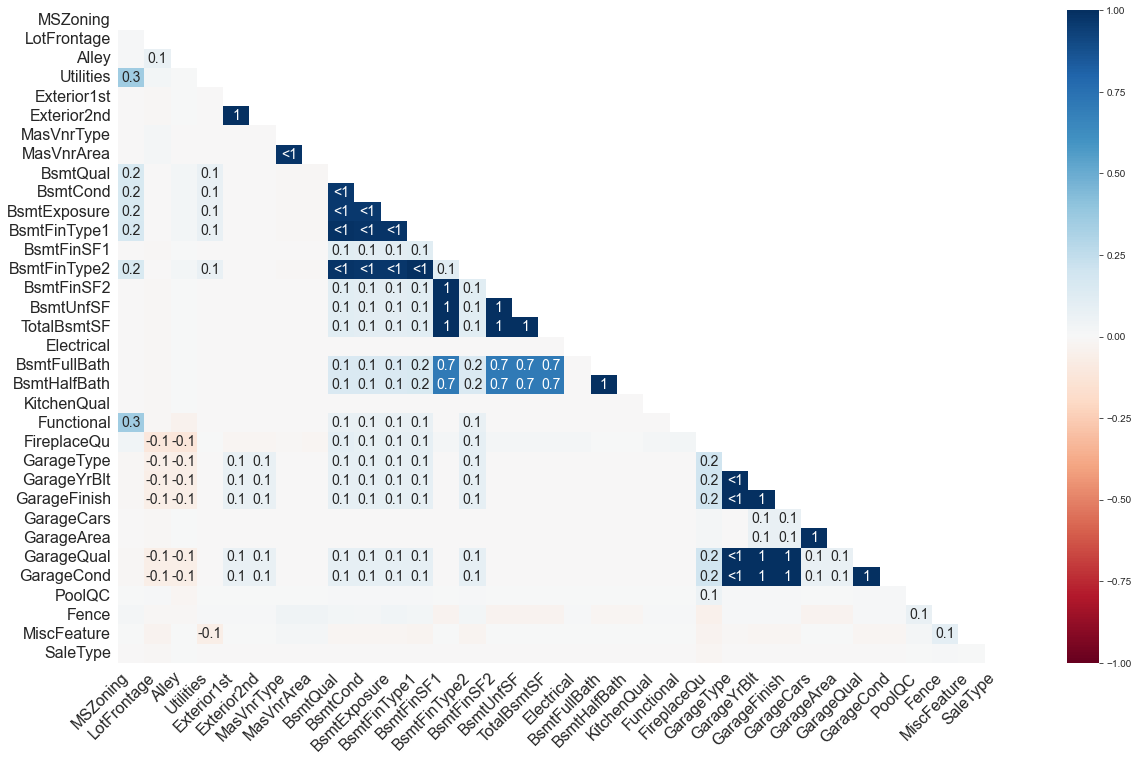

In [7]:
missno.heatmap(X)

In [8]:
import torch

columns = torch.load('data/feature_col.pkl')
num_col, class_col, ordering_col = columns

In [9]:
X_num = X[num_col]
X_class = X[class_col]

In [10]:
# 数量的处理
X_class = pd.get_dummies(X_class, dummy_na=True)

X_class.columns[X_class.sum() == 0]

Index(['Street_nan', 'LotConfig_nan', 'Neighborhood_nan', 'Condition1_nan',
       'Condition2_nan', 'BldgType_nan', 'HouseStyle_nan', 'RoofStyle_nan',
       'RoofMatl_nan', 'Foundation_nan', 'Heating_nan', 'CentralAir_nan',
       'SaleCondition_nan'],
      dtype='object')

In [11]:
X_class.drop(labels=X_class.columns[X_class.sum() == 0], axis=1, inplace=True)

In [12]:
(X_class.sum() == 0).sum()

0

In [13]:
X_class.corrwith(y).sort_values(key=abs, ascending=False)

Foundation_PConc        0.497734
Neighborhood_NridgHt    0.402149
MasVnrType_None        -0.374468
SaleType_New            0.357509
GarageType_Detchd      -0.354141
                          ...   
RoofMatl_Metal         -0.000304
MSZoning_nan                 NaN
Exterior1st_nan              NaN
Exterior2nd_nan              NaN
SaleType_nan                 NaN
Length: 172, dtype: float64

In [14]:
X_class.drop(labels=['MSZoning_nan', 'Exterior1st_nan', 'Exterior2nd_nan', 'SaleType_nan'], axis=1, inplace=True)

In [15]:
X_class.corrwith(y).sort_values(key=abs, ascending=False)

Foundation_PConc        0.497734
Neighborhood_NridgHt    0.402149
MasVnrType_None        -0.374468
SaleType_New            0.357509
GarageType_Detchd      -0.354141
                          ...   
BldgType_TwnhsE         0.003804
Condition2_RRAe         0.002993
Foundation_Wood         0.002711
RoofStyle_Mansard      -0.000308
RoofMatl_Metal         -0.000304
Length: 168, dtype: float64

In [16]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

num_imp = IterativeImputer()
X_num = pd.DataFrame(data=num_imp.fit_transform(X_num), columns=X_num.columns, index=X_num.index)
X_num

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,BedroomAbvGr,KitchenAbvGr
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,...,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,3.0,1.0
2,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,3.0,1.0
3,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,...,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,3.0,1.0
4,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,...,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,3.0,1.0
5,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,...,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,21.0,1936.0,4.0,7.0,1970.0,1970.0,0.0,0.0,0.0,546.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,3.0,1.0
2916,21.0,1894.0,4.0,5.0,1970.0,1970.0,0.0,252.0,0.0,294.0,...,24.0,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,3.0,1.0
2917,160.0,20000.0,5.0,7.0,1960.0,1996.0,0.0,1224.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,4.0,1.0


<AxesSubplot:xlabel='YearBuilt', ylabel='Density'>

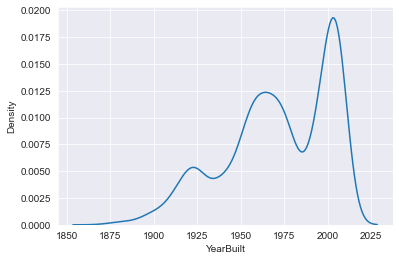

In [17]:
sns.kdeplot(data=X_num.YearBuilt)

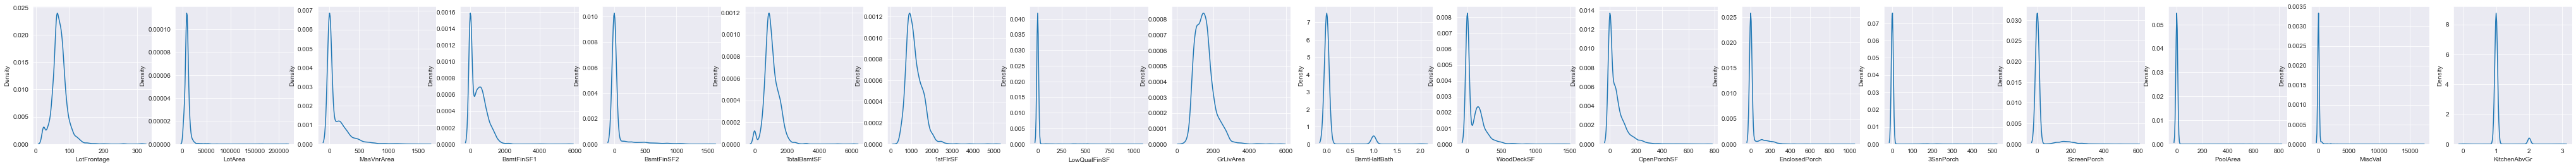

In [18]:
import matplotlib.pyplot as plt

cols = X_num.columns[X_num.skew().abs() > 1]
fig, ax = plt.subplots(1, len(cols), figsize=(len(cols) * 4, 4))
cnt = 0
for col in X_num.columns[X_num.skew().abs() > 1]:
    sns.kdeplot(X_num[col], ax=ax[cnt])
    cnt += 1

In [19]:
from sklearn.preprocessing import power_transform

can_tran_cols = power_transform(X_num, ).any(axis=0)
X_num.loc[:, can_tran_cols] = power_transform(X_num.loc[:, can_tran_cols])


d:\project\python\.venv\lib\site-packages\sklearn\preprocessing\_data.py:3251: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())
d:\project\python\.venv\lib\site-packages\numpy\core\_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
d:\project\python\.venv\lib\site-packages\numpy\core\_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)


In [20]:
X_num

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,BedroomAbvGr,KitchenAbvGr
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.143268,8450.0,0.660391,-0.480136,1.143914,0.924307,1.232500,0.803069,-0.367905,-0.871308,...,0.826757,-0.431952,-0.113306,-0.310052,-0.066884,-0.191250,-1.638570,2008.0,0.190094,-0.165939
2,0.519421,9600.0,-0.036725,2.073321,0.004128,-0.572768,-0.818099,1.016088,-0.367905,-0.417752,...,-1.080224,-0.431952,-0.113306,-0.310052,-0.066884,-0.191250,-0.399664,2007.0,0.190094,-0.165939
3,-0.004678,11250.0,0.660391,-0.480136,1.047877,0.854989,1.195759,0.577608,-0.367905,-0.031735,...,0.651031,-0.431952,-0.113306,-0.310052,-0.066884,-0.191250,1.019582,2008.0,0.190094,-0.165939
4,-0.382042,9550.0,0.660391,-0.480136,-1.625540,-0.817591,-0.818099,0.149292,-0.367905,0.199295,...,0.566184,2.320989,-0.113306,-0.310052,-0.066884,-0.191250,-1.638570,2006.0,0.190094,-0.165939
5,0.684672,14260.0,1.334974,-0.480136,1.000612,0.720011,1.334528,0.756249,-0.367905,0.093640,...,0.979342,-0.431952,-0.113306,-0.310052,-0.066884,-0.191250,1.986094,2008.0,1.367622,-0.165939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,-2.805506,1936.0,-1.516853,1.273536,-0.207715,-0.817591,-0.818099,-1.354225,-0.367905,0.211618,...,-1.080224,-0.431952,-0.113306,-0.310052,-0.066884,-0.191250,-0.026431,2006.0,0.190094,-0.165939
2916,-2.805506,1894.0,-1.516853,-0.480136,-0.207715,-0.817591,-0.818099,0.224719,-0.367905,-0.389053,...,0.393030,-0.431952,-0.113306,-0.310052,-0.066884,-0.191250,-0.789444,2006.0,0.190094,-0.165939
2917,3.257982,20000.0,-0.760542,1.273536,-0.531897,0.464110,-0.818099,1.172170,-0.367905,-2.055618,...,-1.080224,-0.431952,-0.113306,-0.310052,-0.066884,-0.191250,1.019582,2006.0,1.367622,-0.165939


In [21]:
X_num.corrwith(y).abs()

LotFrontage      0.372694
LotArea          0.263843
OverallQual      0.781865
OverallCond      0.067943
YearBuilt        0.560614
YearRemodAdd     0.512305
MasVnrArea       0.391388
BsmtFinSF1       0.232014
BsmtFinSF2       0.052958
BsmtUnfSF        0.199774
TotalBsmtSF      0.602787
1stFlrSF         0.605852
2ndFlrSF         0.156419
LowQualFinSF     0.047932
GrLivArea        0.708624
BsmtFullBath     0.231040
BsmtHalfBath     0.015957
FullBath         0.550956
HalfBath         0.297348
TotRmsAbvGrd     0.521365
Fireplaces       0.481740
GarageYrBlt      0.524859
GarageCars       0.649353
GarageArea       0.607669
WoodDeckSF       0.317969
OpenPorchSF      0.429868
EnclosedPorch    0.183345
3SsnPorch        0.046015
ScreenPorch      0.087145
PoolArea         0.093708
MiscVal          0.068374
MoSold           0.044498
YrSold           0.028923
BedroomAbvGr     0.166565
KitchenAbvGr     0.116695
dtype: float64

In [22]:
# 定序变量的处理
X_order = X[ordering_col.keys()]


In [23]:
has_NA_col = []
no_has_NA = []
for key, rank in ordering_col.items():
    if 'NA' in rank:
        has_NA_col.append(key)
    else:
        no_has_NA.append(key)

has_NA_col, no_has_NA

(['BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinType2',
  'FireplaceQu',
  'GarageFinish',
  'GarageQual',
  'GarageCond',
  'PoolQC',
  'Fence'],
 ['LotShape',
  'LandContour',
  'Utilities',
  'LandSlope',
  'ExterQual',
  'ExterCond',
  'HeatingQC',
  'KitchenQual',
  'Functional',
  'PavedDrive'])

In [24]:
X_order_NA = X_order[has_NA_col]
X_order_noNA = X_order[no_has_NA]

In [25]:
X_order_NA.fillna('NA', inplace=True)

d:\project\python\.venv\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [26]:
X_order_NA.isnull().sum()

BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
dtype: int64

In [27]:
from sklearn.impute import SimpleImputer

fre_imp = SimpleImputer(strategy='most_frequent')
X_order_noNA = pd.DataFrame(data=fre_imp.fit_transform(X_order_noNA), columns=X_order_noNA.columns,
                            index=X_order_noNA.index)
X_order_noNA.isnull().sum()

LotShape       0
LandContour    0
Utilities      0
LandSlope      0
ExterQual      0
ExterCond      0
HeatingQC      0
KitchenQual    0
Functional     0
PavedDrive     0
dtype: int64

In [28]:
X_order = pd.concat([X_order_noNA, X_order_NA], axis=1)
X_order

,LotShape,LandContour,Utilities,LandSlope,ExterQual,ExterCond,HeatingQC,KitchenQual,Functional,PavedDrive,...,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence
Id,,,,,,,,,,,,,,,,,,,,,
1,Reg,Lvl,AllPub,Gtl,Gd,TA,Ex,Gd,Typ,Y,...,TA,No,GLQ,Unf,NA,RFn,TA,TA,NA,NA
2,Reg,Lvl,AllPub,Gtl,TA,TA,Ex,TA,Typ,Y,...,TA,Gd,ALQ,Unf,TA,RFn,TA,TA,NA,NA
3,IR1,Lvl,AllPub,Gtl,Gd,TA,Ex,Gd,Typ,Y,...,TA,Mn,GLQ,Unf,TA,RFn,TA,TA,NA,NA
4,IR1,Lvl,AllPub,Gtl,TA,TA,Gd,Gd,Typ,Y,...,Gd,No,ALQ,Unf,Gd,Unf,TA,TA,NA,NA
5,IR1,Lvl,AllPub,Gtl,Gd,TA,Ex,Gd,Typ,Y,...,TA,Av,GLQ,Unf,TA,RFn,TA,TA,NA,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,Reg,Lvl,AllPub,Gtl,TA,TA,Gd,TA,Typ,Y,...,TA,No,Unf,Unf,NA,NA,NA,NA,NA,NA
2916,Reg,Lvl,AllPub,Gtl,TA,TA,TA,TA,Typ,Y,...,TA,No,Rec,Unf,NA,Unf,TA,TA,NA,NA
2917,Reg,Lvl,AllPub,Gtl,TA,TA,Ex,TA,Typ,Y,...,TA,No,ALQ,Unf,TA,Unf,TA,TA,NA,NA


In [29]:
for key, rank in ordering_col.items():
    X_order[key] = X_order[key].map(lambda x: rank.index(x))

X_order

,LotShape,LandContour,Utilities,LandSlope,ExterQual,ExterCond,HeatingQC,KitchenQual,Functional,PavedDrive,...,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence
Id,,,,,,,,,,,,,,,,,,,,,
1,3,3,3,2,3,2,4,3,7,2,...,3,1,6,1,0,2,3,3,0,0
2,3,3,3,2,2,2,4,2,7,2,...,3,4,5,1,3,2,3,3,0,0
3,2,3,3,2,3,2,4,3,7,2,...,3,2,6,1,3,2,3,3,0,0
4,2,3,3,2,2,2,3,3,7,2,...,4,1,5,1,4,1,3,3,0,0
5,2,3,3,2,3,2,4,3,7,2,...,3,3,6,1,3,2,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,3,3,3,2,2,2,3,2,7,2,...,3,1,1,1,0,0,0,0,0,0
2916,3,3,3,2,2,2,2,2,7,2,...,3,1,3,1,0,1,3,3,0,0
2917,3,3,3,2,2,2,4,2,7,2,...,3,1,5,1,3,1,3,3,0,0


In [30]:
X = pd.concat([X_num, X_class, X_order], axis=1)
X

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.143268,8450.0,0.660391,-0.480136,1.143914,0.924307,1.232500,0.803069,-0.367905,-0.871308,...,3,1,6,1,0,2,3,3,0,0
2,0.519421,9600.0,-0.036725,2.073321,0.004128,-0.572768,-0.818099,1.016088,-0.367905,-0.417752,...,3,4,5,1,3,2,3,3,0,0
3,-0.004678,11250.0,0.660391,-0.480136,1.047877,0.854989,1.195759,0.577608,-0.367905,-0.031735,...,3,2,6,1,3,2,3,3,0,0
4,-0.382042,9550.0,0.660391,-0.480136,-1.625540,-0.817591,-0.818099,0.149292,-0.367905,0.199295,...,4,1,5,1,4,1,3,3,0,0
5,0.684672,14260.0,1.334974,-0.480136,1.000612,0.720011,1.334528,0.756249,-0.367905,0.093640,...,3,3,6,1,3,2,3,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,-2.805506,1936.0,-1.516853,1.273536,-0.207715,-0.817591,-0.818099,-1.354225,-0.367905,0.211618,...,3,1,1,1,0,0,0,0,0,0
2916,-2.805506,1894.0,-1.516853,-0.480136,-0.207715,-0.817591,-0.818099,0.224719,-0.367905,-0.389053,...,3,1,3,1,0,1,3,3,0,0
2917,3.257982,20000.0,-0.760542,1.273536,-0.531897,0.464110,-0.818099,1.172170,-0.367905,-2.055618,...,3,1,5,1,3,1,3,3,0,0


In [31]:
import pandas as pd

X_y = pd.concat([X, y], axis=1)
X_y.corr()['SalePrice'].sort_values(key=abs, ascending=False)

SalePrice            1.000000
OverallQual          0.781865
GrLivArea            0.708624
ExterQual            0.682639
KitchenQual          0.659600
                       ...   
BldgType_TwnhsE      0.003804
Condition2_RRAe      0.002993
Foundation_Wood      0.002711
RoofStyle_Mansard   -0.000308
RoofMatl_Metal      -0.000304
Name: SalePrice, Length: 225, dtype: float64

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

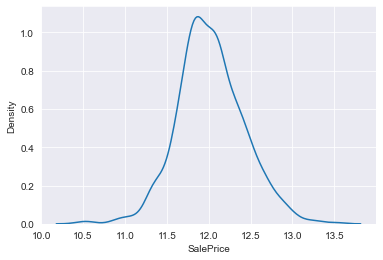

In [31]:
from scipy.stats import yeojohnson

sns.kdeplot(np.log(y))

In [32]:
from sklearn.preprocessing import StandardScaler

X = pd.DataFrame(StandardScaler().fit_transform(X), index=X.index, columns=X.columns)
X

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.143268,-0.217879,0.660391,-0.480136,1.143914,0.924307,1.232500,0.803069,-0.367905,-0.871308,...,0.141836,-0.583117,1.163184,-0.286617,-0.978830,0.316551,0.278091,0.268343,-0.055063,-0.477059
2,0.519421,-0.072044,-0.036725,2.073321,0.004128,-0.572768,-0.818099,1.016088,-0.367905,-0.417752,...,0.141836,2.221033,0.690033,-0.286617,0.682014,0.316551,0.278091,0.268343,-0.055063,-0.477059
3,-0.004678,0.137197,0.660391,-0.480136,1.047877,0.854989,1.195759,0.577608,-0.367905,-0.031735,...,0.141836,0.351600,1.163184,-0.286617,0.682014,0.316551,0.278091,0.268343,-0.055063,-0.477059
4,-0.382042,-0.078385,0.660391,-0.480136,-1.625540,-0.817591,-0.818099,0.149292,-0.367905,0.199295,...,1.881417,-0.583117,0.690033,-0.286617,1.235629,-0.798060,0.278091,0.268343,-0.055063,-0.477059
5,0.684672,0.518903,1.334974,-0.480136,1.000612,0.720011,1.334528,0.756249,-0.367905,0.093640,...,0.141836,1.286316,1.163184,-0.286617,0.682014,0.316551,0.278091,0.268343,-0.055063,-0.477059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,-2.805506,-1.043937,-1.516853,1.273536,-0.207715,-0.817591,-0.818099,-1.354225,-0.367905,0.211618,...,0.141836,-0.583117,-1.202573,-0.286617,-0.978830,-1.912672,-3.913374,-3.942917,-0.055063,-0.477059
2916,-2.805506,-1.049263,-1.516853,-0.480136,-0.207715,-0.817591,-0.818099,0.224719,-0.367905,-0.389053,...,0.141836,-0.583117,-0.256270,-0.286617,-0.978830,-0.798060,0.278091,0.268343,-0.055063,-0.477059
2917,3.257982,1.246808,-0.760542,1.273536,-0.531897,0.464110,-0.818099,1.172170,-0.367905,-2.055618,...,0.141836,-0.583117,0.690033,-0.286617,0.682014,-0.798060,0.278091,0.268343,-0.055063,-0.477059


In [44]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

lof = IsolationForest()
X_train = pd.concat([X.iloc[:len(y)], y], axis=1)
outline_index = lof.fit_predict(X_train)
X_train[outline_index == 1]

d:\project\python\.venv\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.143268,-0.217879,0.660391,-0.480136,1.143914,0.924307,1.232500,0.803069,-0.367905,-0.871308,...,-0.583117,1.163184,-0.286617,-0.978830,0.316551,0.278091,0.268343,-0.055063,-0.477059,208500
2,0.519421,-0.072044,-0.036725,2.073321,0.004128,-0.572768,-0.818099,1.016088,-0.367905,-0.417752,...,2.221033,0.690033,-0.286617,0.682014,0.316551,0.278091,0.268343,-0.055063,-0.477059,181500
3,-0.004678,0.137197,0.660391,-0.480136,1.047877,0.854989,1.195759,0.577608,-0.367905,-0.031735,...,0.351600,1.163184,-0.286617,0.682014,0.316551,0.278091,0.268343,-0.055063,-0.477059,223500
4,-0.382042,-0.078385,0.660391,-0.480136,-1.625540,-0.817591,-0.818099,0.149292,-0.367905,0.199295,...,-0.583117,0.690033,-0.286617,1.235629,-0.798060,0.278091,0.268343,-0.055063,-0.477059,140000
5,0.684672,0.518903,1.334974,-0.480136,1.000612,0.720011,1.334528,0.756249,-0.367905,0.093640,...,1.286316,1.163184,-0.286617,0.682014,0.316551,0.278091,0.268343,-0.055063,-0.477059,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,-0.285307,-0.285470,-0.036725,-0.480136,0.953843,0.720011,-0.818099,-1.354225,-0.367905,0.923362,...,-0.583117,-1.202573,-0.286617,0.682014,0.316551,0.278091,0.268343,-0.055063,-0.477059,175000
1457,0.725325,0.381311,-0.036725,0.425858,0.077812,0.004177,1.132632,0.874778,2.718609,0.297908,...,-0.583117,0.690033,1.807587,0.682014,-0.798060,0.278091,0.268343,-0.055063,1.987605,210000
1458,-0.096700,-0.142806,0.660391,2.832837,-1.059433,1.139836,-0.818099,0.268654,-0.367905,0.805013,...,-0.583117,1.163184,-0.286617,1.235629,0.316551,0.278091,0.268343,-0.055063,2.809160,266500


In [50]:
X_with_no_outline = pd.concat([X_train[outline_index == 1].iloc[:, :-1], X.iloc[len(y):]], axis=0)

In [51]:
X_with_no_outline

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,FireplaceQu,GarageFinish,GarageQual,GarageCond,PoolQC,Fence
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.143268,-0.217879,0.660391,-0.480136,1.143914,0.924307,1.232500,0.803069,-0.367905,-0.871308,...,0.141836,-0.583117,1.163184,-0.286617,-0.978830,0.316551,0.278091,0.268343,-0.055063,-0.477059
2,0.519421,-0.072044,-0.036725,2.073321,0.004128,-0.572768,-0.818099,1.016088,-0.367905,-0.417752,...,0.141836,2.221033,0.690033,-0.286617,0.682014,0.316551,0.278091,0.268343,-0.055063,-0.477059
3,-0.004678,0.137197,0.660391,-0.480136,1.047877,0.854989,1.195759,0.577608,-0.367905,-0.031735,...,0.141836,0.351600,1.163184,-0.286617,0.682014,0.316551,0.278091,0.268343,-0.055063,-0.477059
4,-0.382042,-0.078385,0.660391,-0.480136,-1.625540,-0.817591,-0.818099,0.149292,-0.367905,0.199295,...,1.881417,-0.583117,0.690033,-0.286617,1.235629,-0.798060,0.278091,0.268343,-0.055063,-0.477059
5,0.684672,0.518903,1.334974,-0.480136,1.000612,0.720011,1.334528,0.756249,-0.367905,0.093640,...,0.141836,1.286316,1.163184,-0.286617,0.682014,0.316551,0.278091,0.268343,-0.055063,-0.477059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,-2.805506,-1.043937,-1.516853,1.273536,-0.207715,-0.817591,-0.818099,-1.354225,-0.367905,0.211618,...,0.141836,-0.583117,-1.202573,-0.286617,-0.978830,-1.912672,-3.913374,-3.942917,-0.055063,-0.477059
2916,-2.805506,-1.049263,-1.516853,-0.480136,-0.207715,-0.817591,-0.818099,0.224719,-0.367905,-0.389053,...,0.141836,-0.583117,-0.256270,-0.286617,-0.978830,-0.798060,0.278091,0.268343,-0.055063,-0.477059
2917,3.257982,1.246808,-0.760542,1.273536,-0.531897,0.464110,-0.818099,1.172170,-0.367905,-2.055618,...,0.141836,-0.583117,0.690033,-0.286617,0.682014,-0.798060,0.278091,0.268343,-0.055063,-0.477059


In [52]:
y

Id
1       208500
2       181500
3       223500
4       140000
5       250000
         ...  
1456    175000
1457    210000
1458    266500
1459    142125
1460    147500
Name: SalePrice, Length: 1460, dtype: int64

In [53]:

torch.save([X_with_no_outline, np.log(y[outline_index == 1])], 'data/house_price_v2.pkl')